<CENTER><img src="../images/opendata-top-transblack.png" style="width:40%"></CENTER>

<CENTER><h1>Simple pyROOT notebook example using TLorentz Vectors</h1></CENTER>

In [1]:
import ROOT

Welcome to ROOTaaS 6.06/08


In [2]:
## f = ROOT.TFile.Open("mc_105986.ZZ.root")
## f = ROOT.TFile.Open("mc_147770.Zee.root")
f = ROOT.TFile.Open("http://opendata.atlas.cern/release/samples/MC/mc_147770.Zee.root")

In [3]:
c = ROOT.TCanvas("testCanvas","a first way to plot a variable",800,600)

In [4]:
t = f.Get("mini")

In [5]:
h = ROOT.TH1F("variable","Example plot: Number of Leptons",4,0,4)

In [6]:
h_Mll = ROOT.TH1F("h_Mll","Invariant mass of the two Leptons",50,0,200)

In [7]:
w = 1
for event in t:
    """This is the cut #1: request at least 2 leptons"""
    if t.lep_n > 1:
        """Let's define one TLorentz vector for each, e.i. two vectors!"""
        leadingLep = ROOT.TLorentzVector(t.lep_pt[0], t.lep_eta[0], t.lep_phi[0], t.lep_E[0])
        secondLep  = ROOT.TLorentzVector(t.lep_pt[1], t.lep_eta[1], t.lep_phi[1], t.lep_E[1])

        """Next line does the addition of the two TLorentz vectors above and so,
           we can ask the mass very easy"""
        TL_ll = leadingLep + secondLep
        
        """We devide the value of the combined vector by 1000 to get the value in GeV"""
        mll = TL_ll.M()/1000.
        h_Mll.Fill(mll,w)

print "Done!"

Done!


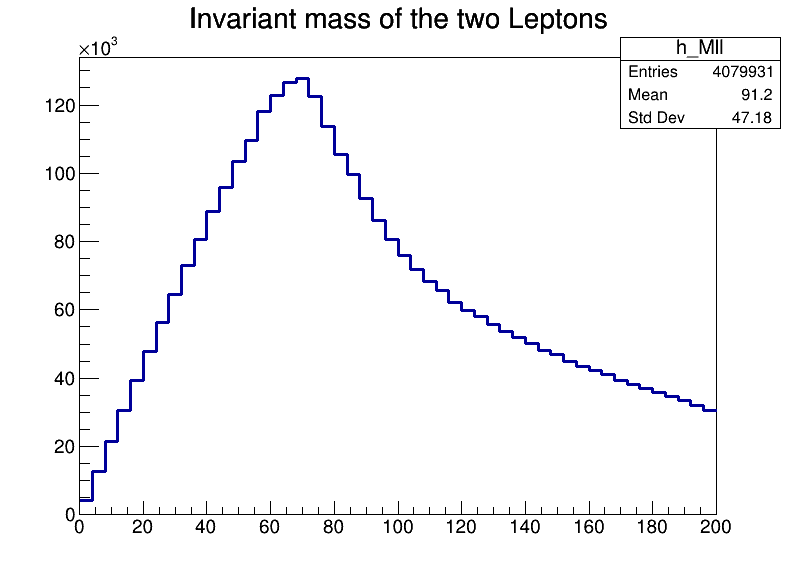

In [8]:
"""Now les't plot the mass of the lepton-lepton system"""
h_Mll.Draw()
c.Draw()